# Correlation Analysis

In [22]:
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_id = '1yB5qSBOLl96Y563nIewKOU8RN_gsY3dO'  # Make sure it's a string
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1yB5qSBOLl96Y563nIewKOU8RN_gsY3dO
To: c:\Users\ncc333\Desktop\DataAndDataAnalysis\Numpy\Class_Task6\data.csv
100%|██████████| 52.0k/52.0k [00:00<00:00, 55.5MB/s]


'data.csv'

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [5]:
from scipy import stats

In [6]:
df

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


### One-Sample t-Test

Question: Is the average beef consumption in Argentina significantly different from 50 kg/person/year?

H₀: Mean beef consumption in Argentina = 50

H₁: Mean beef consumption in Argentina ≠ 50

In [ ]:
# df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
# Select Argentina beef consumption
arg_beef = df[(df["country"] == "Argentina") & (df["food_category"]=="beef")]
arg_beef

,country,food_category,consumption,co2_emission
2,Argentina,beef,55.48,1712.0


In [12]:
arg_consumption_mean = arg_beef["consumption"].mean()
arg_consumption_mean

np.float64(55.48)

In [13]:
#Creating samples around the mean
rg_beef_samples = np.random.normal(loc=arg_consumption_mean, scale=5, size=30) #creates a normal distribution of 30 numbers +-5 values around the mean
rg_beef_samples

array([51.41966621, 56.57158151, 56.3065225 , 54.139156  , 49.6650467 ,
       63.01672866, 60.7299518 , 49.17521493, 56.82810522, 58.5193405 ,
       55.26509719, 52.34704404, 49.2975924 , 57.52577172, 51.01815006,
       56.81777863, 59.30068915, 58.64309971, 53.45056439, 50.17503881,
       63.52722434, 43.12677794, 56.96469685, 64.39654858, 59.24462093,
       53.61280268, 57.73817557, 53.68174252, 57.69254997, 52.57618805])

In [14]:
#One sample test
t_stat, p_val = stats.ttest_1samp(rg_beef_samples, 50)

In [15]:
print(f"T-statistic: {t_stat}")

T-statistic: 6.237619931433288


In [16]:
print(f"P-value: {p_val}")

P-value: 8.316729267677788e-07


since p< 0.05, H₀ will be rejected, where H₀ → beef consumption differs significantly

Is there a relationship between food consumption and CO₂ emissions?
H₀: No correlation between consumption and CO₂ emission
H₁: There is a relationship correlation

In [17]:
corr, p_val = stats.pearsonr(df['consumption'], df["co2_emission"])

In [19]:
print(f"Coorelatioin Coefficient: {corr}")

Coorelatioin Coefficient: 0.334250704433365


In [20]:
print(f"P-Value: {p_val}")

P-Value: 1.1519382934888456e-38


Correlation coefficient (r):
close to zero: no relation

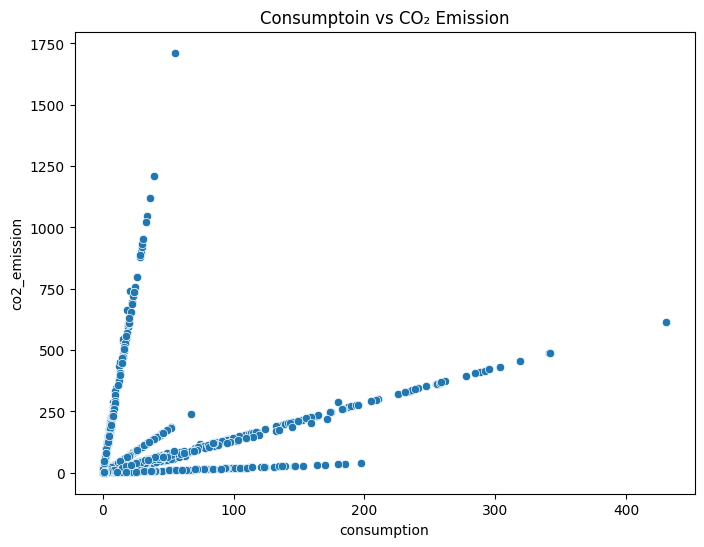

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="consumption", y="co2_emission", data=df)
plt.title("Consumptoin vs CO₂ Emission")
plt.show()